In [1]:
import numpy as np
import scipy as sp
import scipy.fftpack
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline 

Se va a analizar una tabla con información referente a indicadores de accidentes de tránsito con información mensual de 2017-2021, la información se descargo de "https://www.inegi.org.mx/contenidos/masiva/indicadores/temas/accidentes/accidentes_00_xlsx.zip"

In [3]:
df = pd.read_excel("s9_inegi_acc.xlsx")
df

,cve_entidad,desc_entidad,cve_municipio,desc_municipio,id_indicador,indicador,1997,1998,1999,2000,...,2021/m04,2021/m05,2021/m06,2021/m07,2021/m08,2021/m09,2021/m10,2021/m11,2021/m12,unidad_medida
0,0,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,1006000039,Accidentes de tránsito terrestre en zonas urba...,248114.0,262687.0,285494.0,311938.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accidentes
1,0,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,4000000001,Accidentes de tránsito terrestre según mes de ...,NaN,NaN,NaN,NaN,...,27425.0,29923.0,28188.0,28395.0,27227.0,27281.0,30896.0,29841.0,32714.0,Accidentes
2,0,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,6200009438,Víctimas muertas en los accidentes de tránsito,6039.0,4986.0,5525.0,5263.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Víctimas
3,0,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,6200009439,Víctimas heridas en los accidentes de tránsito,98435.0,99238.0,103784.0,116502.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Víctimas
4,1,Aguascalientes,0,Estatal,1006000039,Accidentes de tránsito terrestre en zonas urba...,3864.0,3863.0,4263.0,4967.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accidentes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7207,32,Zacatecas,56,Zacatecas,6200009438,Víctimas muertas en los accidentes de tránsito,0.0,0.0,4.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Víctimas
7208,32,Zacatecas,56,Zacatecas,6200009439,Víctimas heridas en los accidentes de tránsito,175.0,142.0,283.0,359.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Víctimas
7209,32,Zacatecas,57,Trancoso,1006000039,Accidentes de tránsito terrestre en zonas urba...,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accidentes
7210,32,Zacatecas,57,Trancoso,6200009438,Víctimas muertas en los accidentes de tránsito,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Víctimas


In [4]:
print(df.columns.tolist())


['cve_entidad', 'desc_entidad', 'cve_municipio', 'desc_municipio', 'id_indicador', 'indicador', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2017/m01', '2017/m02', '2017/m03', '2017/m04', '2017/m05', '2017/m06', '2017/m07', '2017/m08', '2017/m09', '2017/m10', '2017/m11', '2017/m12', '2018', '2018/m01', '2018/m02', '2018/m03', '2018/m04', '2018/m05', '2018/m06', '2018/m07', '2018/m08', '2018/m09', '2018/m10', '2018/m11', '2018/m12', '2019', '2019/m01', '2019/m02', '2019/m03', '2019/m04', '2019/m05', '2019/m06', '2019/m07', '2019/m08', '2019/m09', '2019/m10', '2019/m11', '2019/m12', '2020', '2020/m01', '2020/m02', '2020/m03', '2020/m04', '2020/m05', '2020/m06', '2020/m07', '2020/m08', '2020/m09', '2020/m10', '2020/m11', '2020/m12', '2021', '2021/m01', '2021/m02', '2021/m03', '2021/m04', '2021/m05', '2021/m06', '2021/m07', '2021/m08', '2021/m09', '2021/m10', '2021/m1

In [5]:
print(df.cve_entidad.unique())
print(df.indicador.unique())
print(df.id_indicador.unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32]
['Accidentes de tránsito terrestre en zonas urbanas y suburbanas'
 'Accidentes de tránsito terrestre según mes de registro del accidente'
 'Víctimas muertas en los accidentes de tránsito'
 'Víctimas heridas en los accidentes de tránsito']
[1006000039 4000000001 6200009438 6200009439]


De nuestro dataset completo, solo requerimos ciertas columnas y renglones, entonces vamos a filtrar

In [6]:
# Filtramos por columnas de interes
#df_interest = df.loc[:,["cve_entidad", "id_indicador", "1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021"]]
df_interest = df.loc[:,["cve_entidad", "id_indicador", '2017/m01', '2017/m02', '2017/m03', '2017/m04', '2017/m05', '2017/m06', '2017/m07', '2017/m08', '2017/m09', '2017/m10', '2017/m11', '2017/m12', '2018/m01', '2018/m02', '2018/m03', '2018/m04', '2018/m05', '2018/m06', '2018/m07', '2018/m08', '2018/m09', '2018/m10', '2018/m11', '2018/m12', '2019/m01', '2019/m02', '2019/m03', '2019/m04', '2019/m05', '2019/m06', '2019/m07', '2019/m08', '2019/m09', '2019/m10', '2019/m11', '2019/m12', '2020/m01', '2020/m02', '2020/m03', '2020/m04', '2020/m05', '2020/m06', '2020/m07', '2020/m08', '2020/m09', '2020/m10', '2020/m11', '2020/m12', '2021/m01', '2021/m02', '2021/m03', '2021/m04', '2021/m05', '2021/m06', '2021/m07', '2021/m08', '2021/m09', '2021/m10', '2021/m11', '2021/m12']]
df_interest

,cve_entidad,id_indicador,2017/m01,2017/m02,2017/m03,2017/m04,2017/m05,2017/m06,2017/m07,2017/m08,...,2021/m03,2021/m04,2021/m05,2021/m06,2021/m07,2021/m08,2021/m09,2021/m10,2021/m11,2021/m12
0,0,1006000039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,4000000001,29894.0,29362.0,31871.0,28334.0,30209.0,29740.0,29765.0,30593.0,...,28723.0,27425.0,29923.0,28188.0,28395.0,27227.0,27281.0,30896.0,29841.0,32714.0
2,0,6200009438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,6200009439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1006000039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7207,32,6200009438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7208,32,6200009439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7209,32,1006000039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7210,32,6200009438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
 #Filtramos por fila (cve_entidad = 0 -> nacional y id_indicador = 4000000001 -> Accidentes de tránsito terrestre según mes de registro del accidente
df_interest = df_interest.query("cve_entidad == 0 & id_indicador == 4000000001")
df_interest = df_interest.drop(columns=["cve_entidad", "id_indicador"])
df_interest

,2017/m01,2017/m02,2017/m03,2017/m04,2017/m05,2017/m06,2017/m07,2017/m08,2017/m09,2017/m10,...,2021/m03,2021/m04,2021/m05,2021/m06,2021/m07,2021/m08,2021/m09,2021/m10,2021/m11,2021/m12
1,29894.0,29362.0,31871.0,28334.0,30209.0,29740.0,29765.0,30593.0,30053.0,32720.0,...,28723.0,27425.0,29923.0,28188.0,28395.0,27227.0,27281.0,30896.0,29841.0,32714.0


In [8]:
# El dataset esta en formato wide, donde cada año tiene una columna, 
# prefiero intercambiar los años en una sola columna (transponer la tabla)
df_melt = pd.melt(df_interest.reset_index(), id_vars=["index"], var_name="year")
df_melt = df_melt.drop(columns=["index"])
df_melt

,year,value
0,2017/m01,29894.0
1,2017/m02,29362.0
2,2017/m03,31871.0
3,2017/m04,28334.0
4,2017/m05,30209.0
5,2017/m06,29740.0
6,2017/m07,29765.0
7,2017/m08,30593.0
8,2017/m09,30053.0
9,2017/m10,32720.0


<AxesSubplot: xlabel='year'>

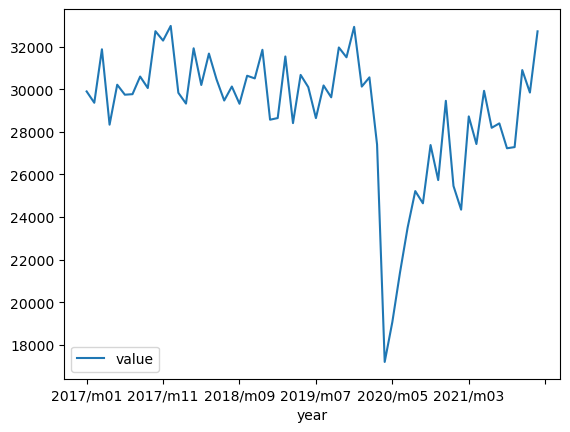

In [9]:
df_melt.plot(x="year", y="value")

In [99]:
acc_fft = sp.fftpack.fft(np.array(df_melt.value))
acc_psd = np.abs(acc_fft) **2

fftfreq = sp.fftpack.fftfreq(len(acc_psd), 1./12)

i = fftfreq > 0

Text(0, 0.5, 'PSD (dB)')

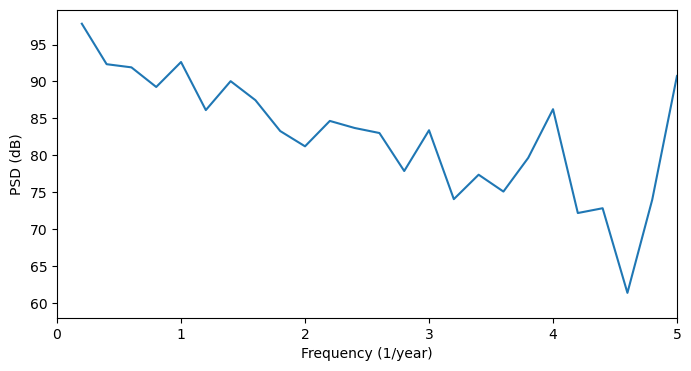

In [100]:
fig, ax = plt.subplots(1,1, figsize=(8,4))

ax.plot(fftfreq[i], 10* np.log10(acc_psd[i]))
ax.set_xlim(0,5)
ax.set_xlabel("Frequency (1/year)")
ax.set_ylabel("PSD (dB)")

In [101]:
acc_fft_bis = acc_fft.copy()
acc_fft_bis[np.abs(fftfreq) > 1.1 ] = 0

Text(0, 0.5, 'Accidents')

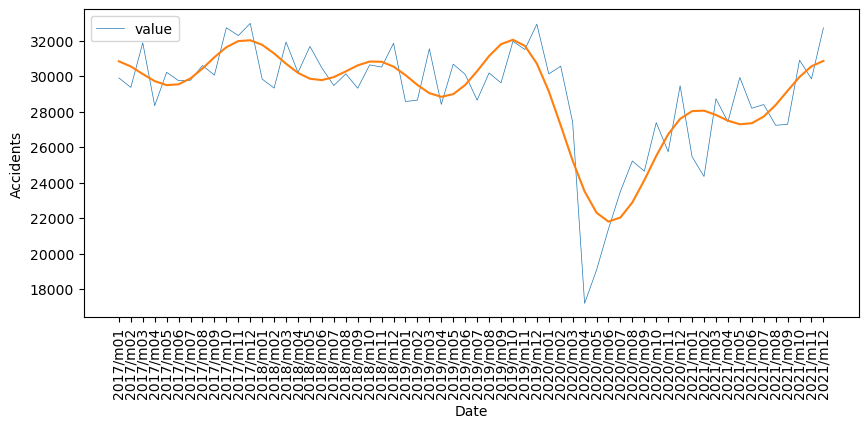

In [109]:
acc_slow = np.real(sp.fftpack.ifft(acc_fft_bis))

fig, ax = plt.subplots(1,1, figsize=(10,4))
df_melt.plot(ax=ax, lw=.5)
ax.plot_date(df_melt.year, acc_slow, "-")
plt.xticks(rotation=90)
ax.set_xlabel("Date")
ax.set_ylabel("Accidents")

La línea naranja es la versión suavizada basada en los datos reales (azul), se puede observar que ambas siguen la misma tendencia en terminos generales.
Con ambas gráficas podemos observar un descenso abrupto en los primeros meses de 2020 que corresponde con la emergencia sanitara debido al covid-19 y las normas de distanciamiento social. La cantidad de tráfico se redujo y por consiguiente la cantidad de accidentes registrados.
Fuera de este descenso, se observa una oscilación relativamente regular con picos cada fin de año, entendible debido a factores socio-culturales como, vacaciones, y celebraciones de fin de año.

Text(0, 0.5, 'Accidents')

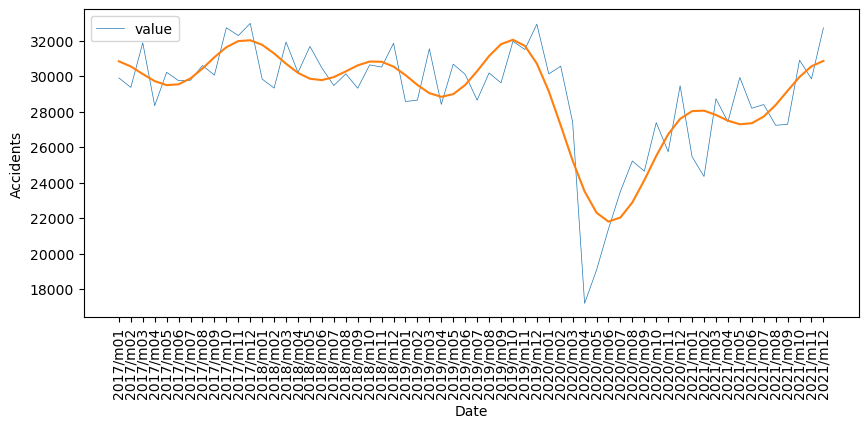

In [13]:
def scipyFourier(values):
    acc_fft = sp.fftpack.fft(np.array(values))
    acc_psd = np.abs(acc_fft) **2

    fftfreq = sp.fftpack.fftfreq(len(acc_psd), 1./12)

    i = fftfreq > 0
    '''
    fig, ax = plt.subplots(1,1, figsize=(8,4))
    ax.plot(fftfreq[i], 10* np.log10(acc_psd[i]))
    ax.set_xlim(0,5)
    ax.set_xlabel("Frequency (1/year)")
    ax.set_ylabel("PSD (dB)")
    '''
    acc_fft_bis = acc_fft.copy()
    acc_fft_bis[np.abs(fftfreq) > 1.1 ] = 0

    acc_slow = np.real(sp.fftpack.ifft(acc_fft_bis))
    return acc_slow


fig, ax = plt.subplots(1,1, figsize=(10,4))
df_melt.plot(ax=ax, lw=.5)
ax.plot_date(df_melt.year, scipyFourier(df_melt.value), "-")
plt.xticks(rotation=90)
ax.set_xlabel("Date")
ax.set_ylabel("Accidents")